In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, mp_drawing.DrawingSpec(color
                             = (80,110,10), thickness = 1, circle_radius = 1), mp_drawing.DrawingSpec(color
                             = (80,256,121), thickness = 1, circle_radius = 1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color
                             = (80,127,19), thickness = 1, circle_radius = 4), mp_drawing.DrawingSpec(color
                             = (80,242,136), thickness = 1, circle_radius = 2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color
                             = (80,95,22), thickness = 1, circle_radius = 4), mp_drawing.DrawingSpec(color
                             = (80,256,116), thickness = 1, circle_radius = 2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color
                             = (80,115,11), thickness = 1, circle_radius = 4), mp_drawing.DrawingSpec(color
                             = (80,250,176), thickness = 1, circle_radius = 2))

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret , frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
results.left_hand_landmarks.landmark

[x: 0.7887927889823914
y: 0.6763603091239929
z: 3.237632313357608e-07
, x: 0.729266345500946
y: 0.6555384397506714
z: -0.02591138519346714
, x: 0.6805541515350342
y: 0.5983137488365173
z: -0.03528955951333046
, x: 0.6453593373298645
y: 0.5450716614723206
z: -0.041783180087804794
, x: 0.6100944876670837
y: 0.5090881586074829
z: -0.0461311936378479
, x: 0.7133556604385376
y: 0.47946637868881226
z: -0.009670001454651356
, x: 0.6849724650382996
y: 0.40136292576789856
z: -0.02114526368677616
, x: 0.6646914482116699
y: 0.3586941957473755
z: -0.032738979905843735
, x: 0.6459681391716003
y: 0.32291874289512634
z: -0.040718477219343185
, x: 0.7478837966918945
y: 0.47049927711486816
z: -0.005594252143055201
, x: 0.7323434948921204
y: 0.38624292612075806
z: -0.006368604488670826
, x: 0.7226763367652893
y: 0.33765992522239685
z: -0.009685613214969635
, x: 0.7133800387382507
y: 0.3036332130432129
z: -0.012962069362401962
, x: 0.7831498980522156
y: 0.48159050941467285
z: -0.006157219875603914
, x: 0

In [10]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [11]:
frame

array([[[244, 247, 255],
        [244, 246, 255],
        [242, 243, 254],
        ...,
        [217, 220, 239],
        [217, 221, 239],
        [217, 221, 239]],

       [[242, 245, 255],
        [242, 244, 255],
        [242, 243, 253],
        ...,
        [215, 219, 237],
        [216, 220, 238],
        [216, 221, 237]],

       [[241, 244, 255],
        [241, 243, 253],
        [241, 243, 251],
        ...,
        [217, 222, 238],
        [217, 222, 238],
        [217, 222, 238]],

       ...,

       [[161, 188, 165],
        [161, 188, 164],
        [161, 189, 163],
        ...,
        [255, 255, 244],
        [255, 255, 245],
        [255, 255, 246]],

       [[156, 189, 162],
        [157, 190, 162],
        [157, 191, 161],
        ...,
        [255, 255, 246],
        [255, 255, 245],
        [255, 255, 245]],

       [[152, 186, 158],
        [153, 188, 159],
        [154, 189, 158],
        ...,
        [255, 255, 246],
        [255, 255, 245],
        [255, 255, 245]]

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

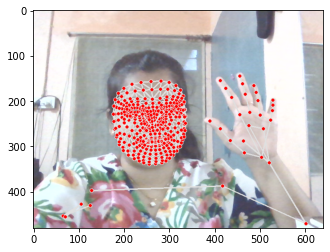

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# KEYPOINT VALUE EXTRACTION

In [16]:
results.left_hand_landmarks.landmark

[x: 0.7887927889823914
y: 0.6763603091239929
z: 3.237632313357608e-07
, x: 0.729266345500946
y: 0.6555384397506714
z: -0.02591138519346714
, x: 0.6805541515350342
y: 0.5983137488365173
z: -0.03528955951333046
, x: 0.6453593373298645
y: 0.5450716614723206
z: -0.041783180087804794
, x: 0.6100944876670837
y: 0.5090881586074829
z: -0.0461311936378479
, x: 0.7133556604385376
y: 0.47946637868881226
z: -0.009670001454651356
, x: 0.6849724650382996
y: 0.40136292576789856
z: -0.02114526368677616
, x: 0.6646914482116699
y: 0.3586941957473755
z: -0.032738979905843735
, x: 0.6459681391716003
y: 0.32291874289512634
z: -0.040718477219343185
, x: 0.7478837966918945
y: 0.47049927711486816
z: -0.005594252143055201
, x: 0.7323434948921204
y: 0.38624292612075806
z: -0.006368604488670826
, x: 0.7226763367652893
y: 0.33765992522239685
z: -0.009685613214969635
, x: 0.7133800387382507
y: 0.3036332130432129
z: -0.012962069362401962
, x: 0.7831498980522156
y: 0.48159050941467285
z: -0.006157219875603914
, x: 0

In [18]:
for res in results.left_hand_landmarks.landmark:
    test  = np.array([res.x, res.y, res.z, res.visibility])

In [19]:
test

array([ 0.82688677,  0.4138279 , -0.00530882,  0.        ])

In [55]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [56]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [57]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [58]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [59]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
len(rh)

63

In [61]:
len(face)

1404

In [62]:
pose

array([ 4.29206759e-01,  5.00774741e-01, -1.39756286e+00,  9.99889791e-01,
        4.61385399e-01,  4.26741123e-01, -1.32862020e+00,  9.99793887e-01,
        4.84675586e-01,  4.24728960e-01, -1.32843900e+00,  9.99790251e-01,
        5.02198935e-01,  4.24891502e-01, -1.32822406e+00,  9.99739587e-01,
        3.98340881e-01,  4.36680287e-01, -1.32490826e+00,  9.99827862e-01,
        3.79373014e-01,  4.41341251e-01, -1.32452512e+00,  9.99845088e-01,
        3.66079837e-01,  4.46170628e-01, -1.32471871e+00,  9.99836981e-01,
        5.39286256e-01,  4.56483781e-01, -8.26281250e-01,  9.99829829e-01,
        3.49644005e-01,  4.83527273e-01, -7.86870241e-01,  9.99875546e-01,
        4.81765598e-01,  5.78365207e-01, -1.19994128e+00,  9.99852479e-01,
        4.01130438e-01,  5.89920938e-01, -1.19032109e+00,  9.99853909e-01,
        6.99113786e-01,  7.70340502e-01, -4.93698925e-01,  9.96368110e-01,
        2.21752957e-01,  8.33414018e-01, -4.94139910e-01,  9.93084013e-01,
        9.82019305e-01,  

In [28]:
lh

array([ 7.88792789e-01,  6.76360309e-01,  3.23763231e-07,  0.00000000e+00,
        7.29266346e-01,  6.55538440e-01, -2.59113852e-02,  0.00000000e+00,
        6.80554152e-01,  5.98313749e-01, -3.52895595e-02,  0.00000000e+00,
        6.45359337e-01,  5.45071661e-01, -4.17831801e-02,  0.00000000e+00,
        6.10094488e-01,  5.09088159e-01, -4.61311936e-02,  0.00000000e+00,
        7.13355660e-01,  4.79466379e-01, -9.67000145e-03,  0.00000000e+00,
        6.84972465e-01,  4.01362926e-01, -2.11452637e-02,  0.00000000e+00,
        6.64691448e-01,  3.58694196e-01, -3.27389799e-02,  0.00000000e+00,
        6.45968139e-01,  3.22918743e-01, -4.07184772e-02,  0.00000000e+00,
        7.47883797e-01,  4.70499277e-01, -5.59425214e-03,  0.00000000e+00,
        7.32343495e-01,  3.86242926e-01, -6.36860449e-03,  0.00000000e+00,
        7.22676337e-01,  3.37659925e-01, -9.68561321e-03,  0.00000000e+00,
        7.13380039e-01,  3.03633213e-01, -1.29620694e-02,  0.00000000e+00,
        7.83149898e-01,  

In [244]:
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([face, pose, lh, rh])

In [245]:
extract_keypoints(results)

array([ 0.53557855,  0.57222235, -0.04186891, ...,  0.        ,
        0.        ,  0.        ])

In [246]:
test_result = extract_keypoints(results)

In [247]:
test_result

array([ 0.53557855,  0.57222235, -0.04186891, ...,  0.        ,
        0.        ,  0.        ])

In [248]:
np.save('0', test_result)

In [249]:
np.load('0.npy')

array([ 0.53557855,  0.57222235, -0.04186891, ...,  0.        ,
        0.        ,  0.        ])

# SETTING COLLECTION FOLDER

In [250]:
#exported data path
data_path = os.path.join('MP_DATA')
#actions to be determined
actions = np.array(['hello', 'thanks', 'peace'])
#no. of videos
no_sequences = 30
#no. of frames in videos
sequence_length = 30

In [251]:
for action in actions:
    for sequence in range (no_sequences):
        try:
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass

# COLLECTING DATA

In [252]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    for action in actions:
        for sequence in range (no_sequences):
            for frame_num in range(sequence_length):
                
                ret , frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                print(results)

                draw_styled_landmarks(image, results)
                
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                cv2.imshow('OpenCV Feed', image)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [253]:
cap.release()
cv2.destroyAllWindows()

# DATA PREPROCESSING

In [254]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [255]:
label_map = {label:num for num, label in enumerate(actions)}

In [256]:
label_map

{'hello': 0, 'thanks': 1, 'peace': 2}

In [257]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(data_path, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [258]:
np.array(sequences).shape

(90, 30, 1662)

In [259]:
X = np.array(sequences, dtype=np.float)

In [130]:
X

array([[[ 0.6691156 ,  0.73727429, -0.02710209, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.65765834,  0.73035139, -0.02831481, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.65549725,  0.72986501, -0.02990573, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.71918327,  0.69103986, -0.0297425 , ...,  0.40704024,
          0.38964194, -0.06305426],
        [ 0.71690094,  0.68942875, -0.03036213, ...,  0.40712538,
          0.38841063, -0.05647572],
        [ 0.71617395,  0.68982267, -0.02964532, ...,  0.38410881,
          0.37081274, -0.07552839]],

       [[ 0.71630985,  0.69065416, -0.02922952, ...,  0.34694725,
          0.36459517, -0.07054327],
        [ 0.70135242,  0.69401532, -0.03159628, ...,  0.27452689,
          0.34474814, -0.07185382],
        [ 0.70221198,  0.69484687, -0.03162105, ...,  0.27352881,
          0.35065609, -0.06661982],
        ...,
        [ 0.6954515 ,  0.69810945, -0.03015788, ...,  

In [260]:
X.shape

(90, 30, 1662)

In [261]:
y = to_categorical(labels).astype(int)

In [262]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [263]:
y_test.shape

(5, 3)

In [264]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [265]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [278]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [267]:
res = [0.7, 0.2, 0.1]

In [268]:
actions[np.argmax(res)]

'hello'

In [279]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [270]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 303ms/step - loss: 1.3601 - categorical_accuracy: 0.2896
Epoch 2/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.7779 - categorical_accuracy: 0.3250
Epoch 3/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.2706 - categorical_accuracy: 0.4325
Epoch 4/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.1581 - categorical_accuracy: 0.4597
Epoch 5/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.6615 - categorical_accuracy: 0.3874
Epoch 6/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.5584 - categorical_accuracy: 0.3365
Epoch 7/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.3421 - categorical_accuracy: 0.3600
Epoch 8/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.5454 - categorical_accuracy: 0.3738
Epoch 9/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.3716 - categorical_accuracy: 0.3249


In [271]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_16 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# Make Predictions


In [272]:
res = model.predict(X_test)

In [273]:
res

array([[3.6507972e-02, 1.3223040e-01, 8.3126158e-01],
       [2.5103092e-02, 7.0237619e-01, 2.7252066e-01],
       [1.6632207e-03, 9.9340701e-01, 4.9297633e-03],
       [5.6874347e-01, 9.4741856e-04, 4.3030912e-01],
       [3.3810174e-01, 3.6225864e-03, 6.5827566e-01]], dtype=float32)

In [274]:
actions[np.argmax(res[4])]

'peace'

In [275]:
actions[np.argmax(y_test[4])]

'hello'

# Saving Weights

In [276]:
model.save('action.h5')

In [277]:
del model

In [280]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix

In [281]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [282]:
yhat = model.predict(X_test)

In [283]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [284]:
yhat

[2, 1, 1, 0, 2]

In [285]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [1, 1]],

       [[3, 1],
        [0, 1]],

       [[2, 1],
        [1, 1]]], dtype=int64)

In [286]:
accuracy_score(ytrue, yhat)

0.6

# Test in Real Time

In [287]:
X_test.shape

(5, 30, 1662)

In [288]:
np.expand_dims(X_test[0], axis = 0).shape

(1, 30, 1662)

In [289]:
model.predict(np.expand_dims(X_test[0], axis = 0))

array([[0.03650804, 0.13222723, 0.8312647 ]], dtype=float32)

In [317]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

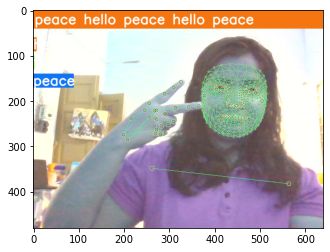

In [318]:
plt.imshow(prob_viz(res, actions, image, colors))

In [316]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
         #3. Viz logic
        
            if np.unique(predictions[-10:])[0]==np.argmax(res):  
                if res[np.argmax(res)] > threshold: 

                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            
        
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [313]:
cap.release()
cv2.destroyAllWindows()